<a href="https://colab.research.google.com/github/sohaibhassan57/Deep_learning_PIAIC_2020__JUL/blob/master/Cat_dog_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/new_small_dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 200 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/new_small_dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [7]:
cnn = Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(2, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
from keras.models import Model
MODEL_FILE = '/content/drive/My Drive/Dataset_cat_dog/'+ "classifier__class.model"


In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 100)
cnn.save(MODEL_FILE)

Epoch 1/100
7/7 [==============================] - 88s 13s/step - loss: 6.2841 - accuracy: 0.5400 - val_loss: 0.7559 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 4s 537ms/step - loss: 0.8190 - accuracy: 0.5400 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 4s 540ms/step - loss: 0.6635 - accuracy: 0.5350 - val_loss: 0.7285 - val_accuracy: 0.4750
Epoch 4/100
7/7 [==============================] - 4s 534ms/step - loss: 0.6892 - accuracy: 0.5650 - val_loss: 0.6499 - val_accuracy: 0.6750
Epoch 5/100
7/7 [==============================] - 4s 539ms/step - loss: 0.6731 - accuracy: 0.6450 - val_loss: 0.8452 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 4s 536ms/step - loss: 0.6545 - accuracy: 0.6000 - val_loss: 0.7552 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 4s 535ms/step - loss: 0.6539 - accuracy: 0.6550 - val_loss: 0.7360 - val_accuracy: 0.4250
Epoch 8/100
7/

## Part 4 - Making a single prediction

In [27]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/new_small_dataset/prediction/cute_cat.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
'''if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat' 
'''

"if result[0][0] == 1:\n  prediction = 'dog'\nelse:\n  prediction = 'cat' \n"

In [28]:
labels=["cat","dog"]
arr=result[0].tolist()
num=arr.index(max(arr))
print("prediction is \"",labels[num],"\"")
print("accuracy",max(arr))

prediction is " cat "
accuracy 1.0


In [20]:
test_set.class_indices

{'cat': 0, 'dog': 1}

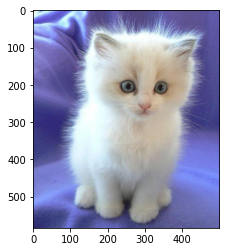

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/new_small_dataset/prediction/cute_cat.jpg')
img=plt.imshow(img)
plt.show()

In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/new_small_dataset/prediction/download.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
'''if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat' 
'''

"if result[0][0] == 1:\n  prediction = 'dog'\nelse:\n  prediction = 'cat' \n"

In [25]:
labels=["cat","dog"]
arr=result[0].tolist()
num=arr.index(max(arr))
print("prediction is \"",labels[num],"\"")
print("accuracy",max(arr))

prediction is " dog "
accuracy 1.0


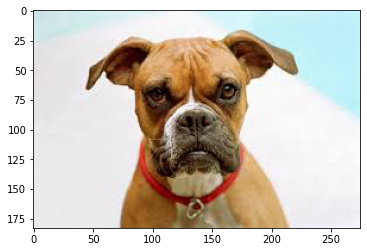

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/new_small_dataset/prediction/download.jpg')
img=plt.imshow(img)
plt.show()

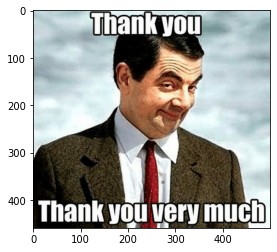

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/new_small_dataset/prediction/thnks.jpg')
img=plt.imshow(img)
plt.show()